In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('penguins_lter.csv')

In [3]:
data.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN


In [4]:
data['Species']=data['Species'].apply(lambda x:x.split('(')[0])

EDA:
    1. How many penguins of each species in each Island?
    
    2. How many species?
    
    3. Clutch Completion of each species wrt island
    
    4. Culmen length, Culmen Depth wrt species
    
    5. Flipper Length wrt species
    
    6. Sex ratio of each species
    
    7. Body Mass of each species

In [5]:
data.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [6]:
# Dropping unwanted columns
data.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    object 
 8   Body Mass (g)        342 non-null    object 
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(4), object(8)
memory usage: 32.4+ KB


In [8]:
data.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

## Handling Missing Values

#### 1.  Handling numerical columns
Culmen Length, Culmen Depth, Delta 15 N (o/oo), Delta 13 C (o/oo) are having null values and are in float datatype. Hence, imputing null values with median value.

In [9]:
numerical=['Culmen Length (mm)','Culmen Depth (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
categorical = ['Flipper Length (mm)','Body Mass (g)','Sex']

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical] = imputer.fit_transform(data[numerical])

#### 2. Handling categorical columns
Flipper Length, Body Mass, Sex columns are having null values and are in categorical datatype. Hence, imputing null values with mode value.

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data[categorical]=imputer.fit_transform(data[categorical])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   344 non-null    float64
 6   Culmen Depth (mm)    344 non-null    float64
 7   Flipper Length (mm)  344 non-null    object 
 8   Body Mass (g)        344 non-null    object 
 9   Sex                  344 non-null    object 
 10  Delta 15 N (o/oo)    344 non-null    float64
 11  Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(4), object(8)
memory usage: 32.4+ KB


In [13]:
# Find odd values 
list(data['Flipper Length (mm)'].str.findall(r'[^/d]'))

[['1', '8', '1'],
 ['1', '8', '6'],
 ['.'],
 ['1', '9', '0'],
 ['1', '9', '3'],
 ['1', '9', '0'],
 ['1', '8', '1'],
 ['1', '9', '5'],
 ['1', '9', '3'],
 ['1', '9', '0'],
 ['1', '8', '6'],
 ['1', '8', '0'],
 ['1', '8', '2'],
 ['1', '9', '1'],
 ['1', '9', '8'],
 ['1', '8', '5'],
 ['1', '9', '5'],
 ['1', '9', '7'],
 ['1', '8', '4'],
 ['1', '9', '4'],
 ['1', '7', '4'],
 ['1', '8', '0'],
 ['1', '8', '9'],
 ['1', '8', '5'],
 ['1', '8', '0'],
 ['1', '8', '7'],
 ['1', '8', '3'],
 ['1', '8', '7'],
 ['1', '7', '2'],
 ['1', '8', '0'],
 ['1', '7', '8'],
 ['1', '7', '8'],
 ['1', '8', '8'],
 ['1', '8', '4'],
 ['1', '9', '5'],
 ['1', '9', '6'],
 ['1', '9', '0'],
 ['1', '8', '0'],
 ['1', '8', '1'],
 ['1', '8', '4'],
 ['1', '8', '2'],
 ['1', '9', '5'],
 ['1', '8', '6'],
 ['1', '9', '6'],
 ['1', '8', '5'],
 ['1', '9', '0'],
 ['1', '8', '2'],
 ['1', '7', '9'],
 ['1', '9', '0'],
 ['1', '9', '1'],
 ['1', '8', '6'],
 ['1', '8', '8'],
 ['1', '9', '0'],
 ['2', '0', '0'],
 ['1', '8', '7'],
 ['1', '9', '1'],
 [

In [14]:
# Find odd values 
list(data['Body Mass (g)'].str.findall(r'[^/d]'))

[['.'],
 ['3', '8', '0', '0'],
 ['3', '2', '5', '0'],
 ['3', '8', '0', '0'],
 ['3', '4', '5', '0'],
 ['3', '6', '5', '0'],
 ['3', '6', '2', '5'],
 ['4', '6', '7', '5'],
 ['3', '4', '7', '5'],
 ['4', '2', '5', '0'],
 ['3', '3', '0', '0'],
 ['3', '7', '0', '0'],
 ['3', '2', '0', '0'],
 ['3', '8', '0', '0'],
 ['4', '4', '0', '0'],
 ['3', '7', '0', '0'],
 ['3', '4', '5', '0'],
 ['4', '5', '0', '0'],
 ['3', '3', '2', '5'],
 ['4', '2', '0', '0'],
 ['3', '4', '0', '0'],
 ['3', '6', '0', '0'],
 ['3', '8', '0', '0'],
 ['3', '9', '5', '0'],
 ['3', '8', '0', '0'],
 ['3', '8', '0', '0'],
 ['3', '5', '5', '0'],
 ['3', '2', '0', '0'],
 ['3', '1', '5', '0'],
 ['3', '9', '5', '0'],
 ['3', '2', '5', '0'],
 ['3', '9', '0', '0'],
 ['3', '3', '0', '0'],
 ['3', '9', '0', '0'],
 ['3', '3', '2', '5'],
 ['4', '1', '5', '0'],
 ['3', '9', '5', '0'],
 ['3', '5', '5', '0'],
 ['3', '3', '0', '0'],
 ['4', '6', '5', '0'],
 ['3', '1', '5', '0'],
 ['3', '9', '0', '0'],
 ['3', '1', '0', '0'],
 ['4', '4', '0', '0'],
 ['

In [15]:
data['Sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: Sex, dtype: int64

In [16]:
data['Sex']=data['Sex'].str.replace('.',data['Sex'].mode()[0])

In [17]:
## From the above result, we observe that there are non-alphabet, non-numeric values. Let's handle it
data['Flipper Length (mm)']=data['Flipper Length (mm)'].str.replace('.',data['Flipper Length (mm)'].mode()[0])
data['Body Mass (g)']=data['Body Mass (g)'].str.replace('.',data['Body Mass (g)'].mode()[0])

In [18]:
### Convert Flipper Length, Body mass to numeric
data['Flipper Length (mm)'] = pd.to_numeric(data['Flipper Length (mm)'])
data['Body Mass (g)'] = pd.to_numeric(data['Body Mass (g)'])

## Exploratory Data Analysis

### 1. Total number of penguins in each species

Text(0.5, 1.0, 'Count of each Species')

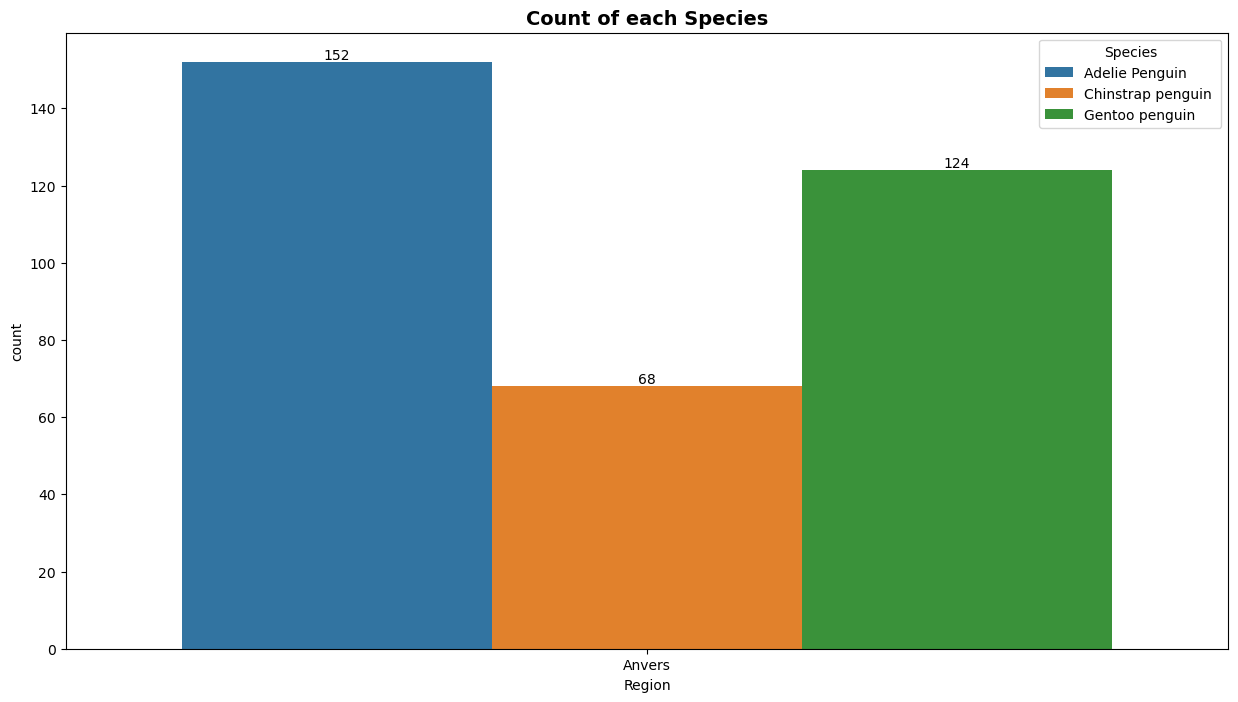

In [19]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=data,x='Region',hue='Species')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Count of each Species",fontsize=14,fontweight='black')

### Observations:

1. There are large number (152) of Adelie Penguins in Anvers Region.
2. There are least number (68) of Chinstrip Penguins in Anvers Region.

### 2. Species in each Island

Text(0.5, 1.0, 'Penguin Species in each Island')

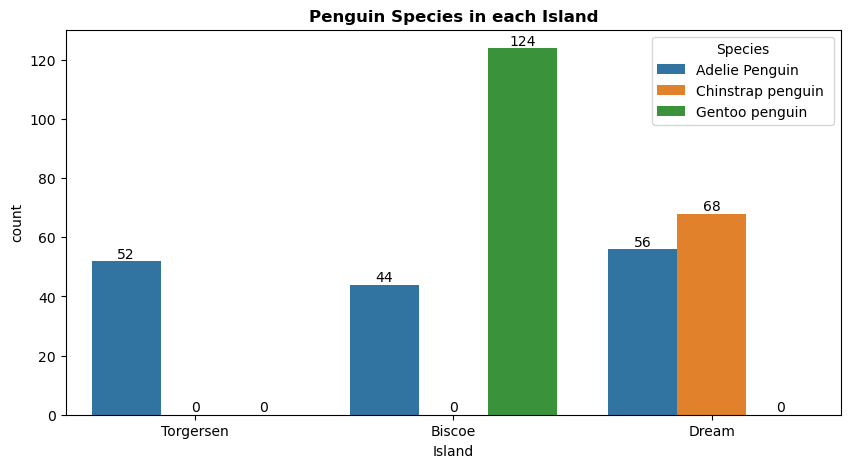

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=data,x='Island',hue='Species')#,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('BrBG',2))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title("Penguin Species in each Island",fontsize=12,fontweight='black')

### Observations:

1. Adelie Penguins are present in all three islands.
2. Chinstrap Penguins are present in Dream Island.
3. Gentoo Penguins are present in Biscoe Island.
4. On Torgersen Island only Adelie Penguins are present.
5. On Biscoe Island, Adelie and Gentoo Penguins are present.
6. On Dream Island, Adelie and Chinstrap Penguins are present.
7. Overall, count(Adelie) > count(Gentoo) > count(Chinstrap) 

### 3. Average length of Culmen of each species

In [21]:
def culmin_length_width(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=data,x='Species',y=col)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col} of each Species")
    
    plt.subplot(1,2,2)
    df = pd.DataFrame(data.groupby('Species')[col].mean())
    ax=sns.barplot(data=df,x=df.index,y=col)
    plt.xticks(rotation=90)
    plt.title(f"Average {col} of each species")

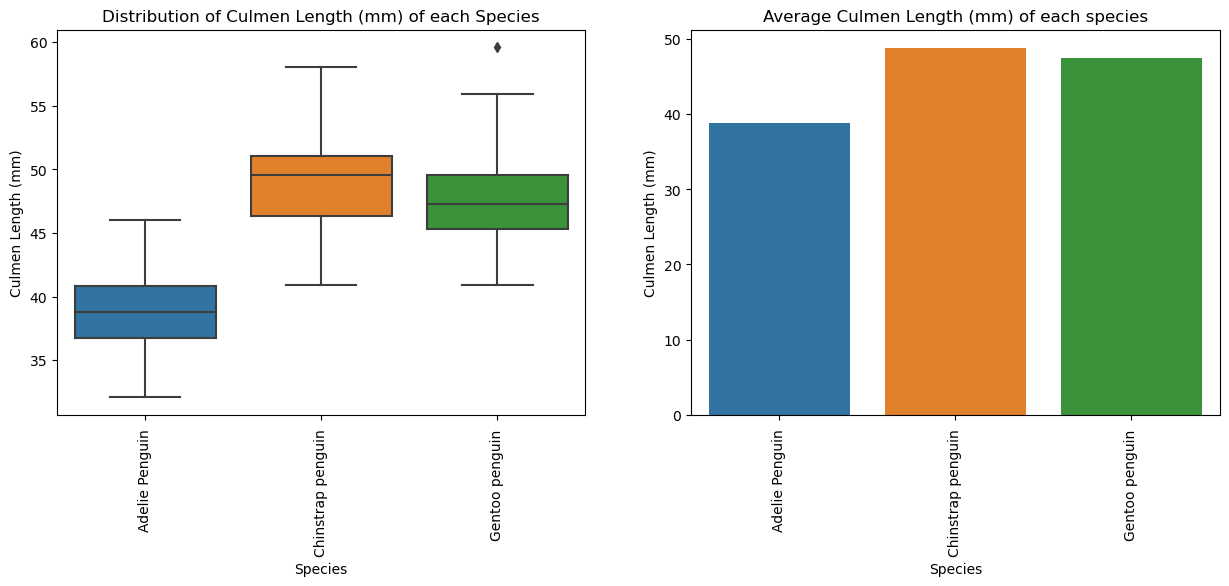

In [22]:
culmin_length_width('Culmen Length (mm)')

### Observations:

1. Chinstrap and Gentoo Penguins are having large Culmen Length (mm).
2. Gentoo penguins have largest Culmen Length (mm) around 58mm as outlier.
3. Adelie penguins have smallest Culmen Length (mm).

### 4. Average Depth of Culmen of each species

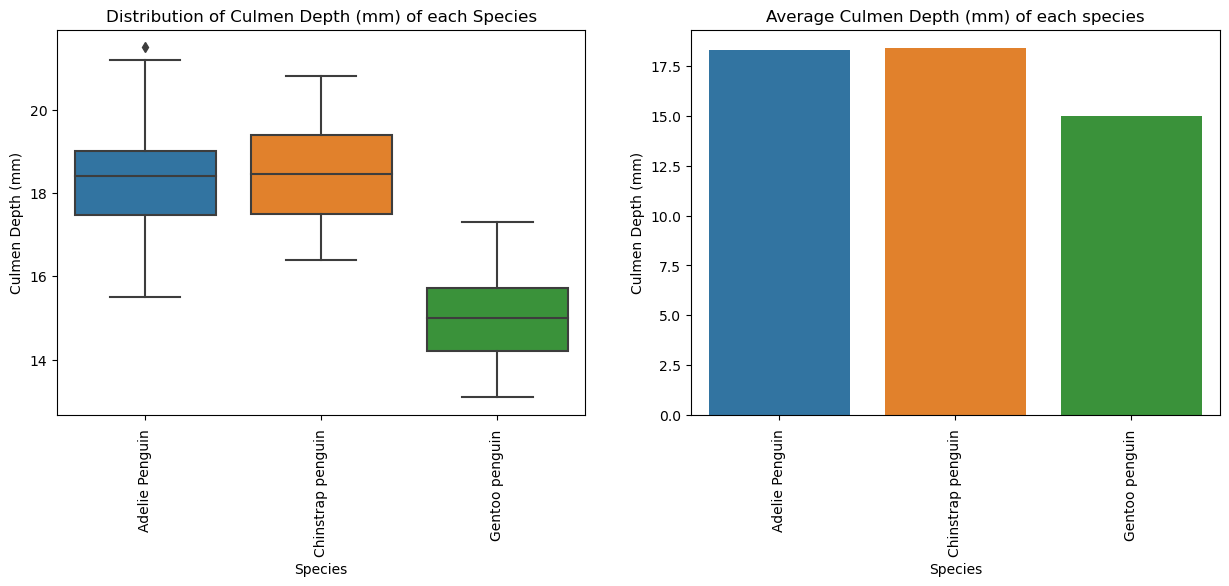

In [23]:
culmin_length_width('Culmen Depth (mm)')

### Observations:

1. Adelie and Chinstrap Penguins have high Culmen Depth (mm) and Adelie Penguins have highest culmen depth as outlier.
2. Gentoo Penguins have smallest Culmen Depth (mm).

### 5. Average Flipper length of each species

In [24]:
def flipper_length_width(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=data,x='Species',y=col)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col} of each Species")
    
    plt.subplot(1,2,2)
    df = pd.DataFrame(data.groupby('Species')[col].mean())
    ax=sns.barplot(data=df,x=df.index,y=col)
    plt.xticks(rotation=90)
    plt.title(f"Average {col} of each species")

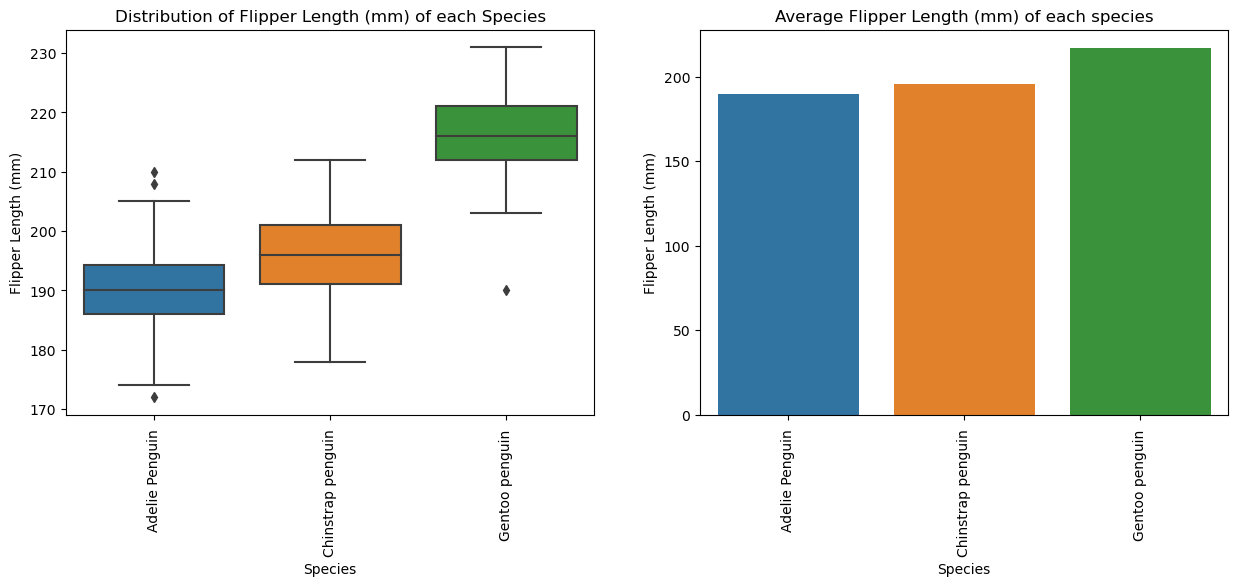

In [25]:
flipper_length_width('Flipper Length (mm)')

### Observations:

1. From flipper length data distribution, we observe that generally Gentoo Penguins have high flipper length, but some of them have low flipper length.
2. The Average flipper length of Gentoo Penguin is largest and Adelie Penguin is smallest among three species.

### 5. Average Body mass of each species

In [26]:
def average_body_mass(col):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.boxplot(data=data,x='Species',y=col)
    plt.xticks(rotation=90)
    plt.title(f"{col} distribution of each species",fontsize=14,fontweight='black')
    
    plt.subplot(1,2,2)
    df=pd.DataFrame(data.groupby('Species')[col].mean())
    sns.barplot(data=df,x=df.index,y=col)
    plt.xticks(rotation=90)
    plt.title(f"Average {col} of each Species",fontsize=12,fontweight='black')

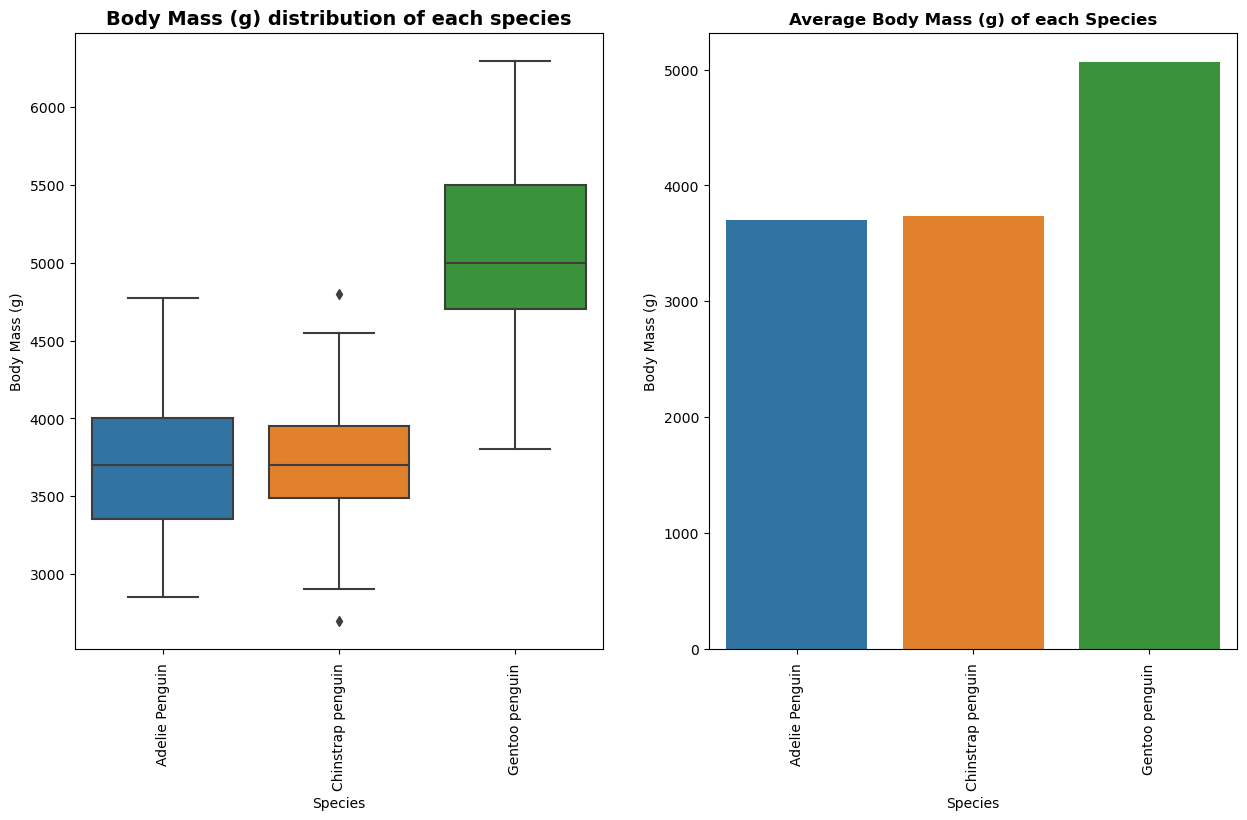

In [27]:
average_body_mass('Body Mass (g)')

### Observations:

1. THe Body mass of Gentoo is very high compared to other two species.
2. THe average Body Mass of Adelie and Chinstrap Penguins are very close.

### 5. Flipper length of each species wrt gender

Text(0.5, 1.0, 'Flipper Length of each species wrt Sex')

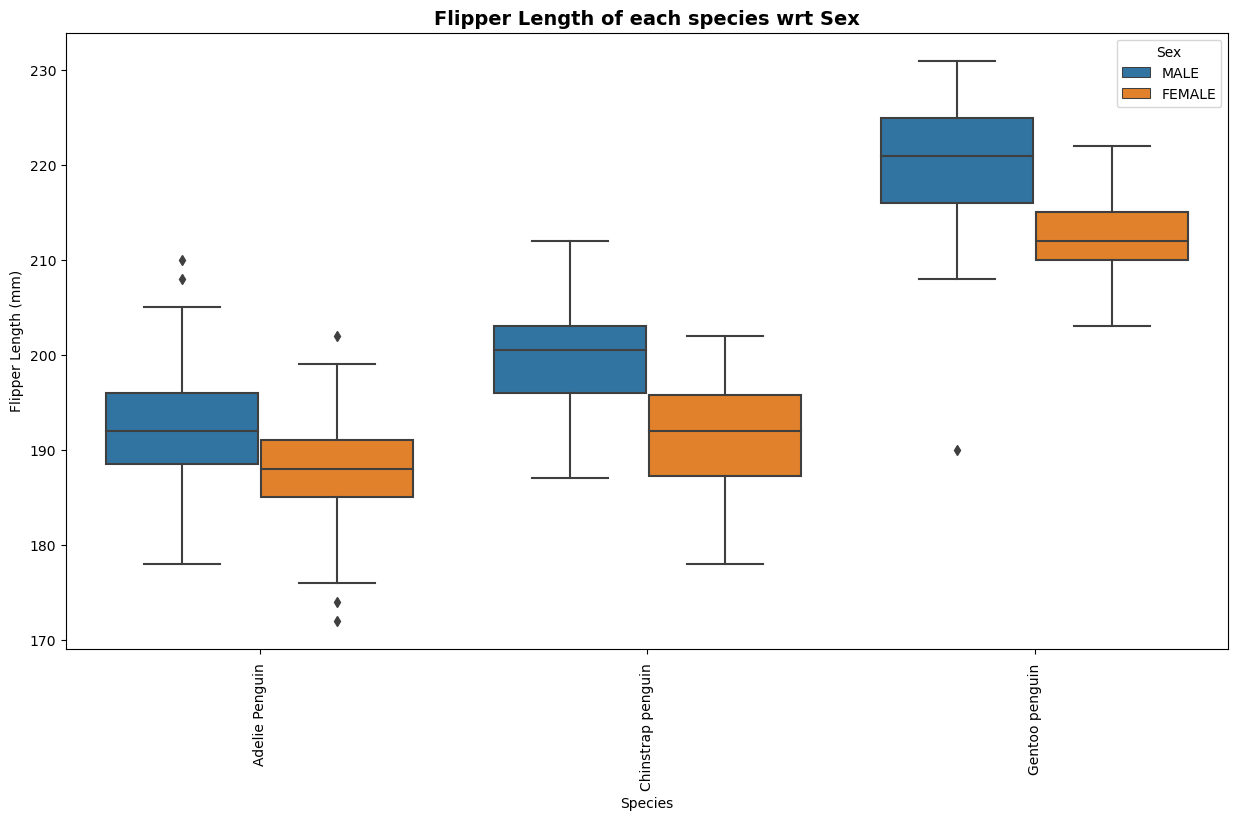

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data,x='Species',y='Flipper Length (mm)',hue='Sex')
plt.xticks(rotation=90)
plt.title("Flipper Length of each species wrt Sex",fontsize=14,fontweight='black')

### Observations:

1. The flipper length of Male Penguins are high compared to Female Penguins.

In [29]:
data.head()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.10,18.7,181,3800,MALE,8.652405,-25.83352
1,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,39.50,17.4,186,3800,FEMALE,8.949560,-24.69454
2,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,40.30,18.0,190,3250,FEMALE,8.368210,-25.33302
3,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,44.45,17.3,190,3800,MALE,8.652405,-25.83352
4,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,36.70,19.3,193,3450,FEMALE,8.766510,-25.32426


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   344 non-null    float64
 6   Culmen Depth (mm)    344 non-null    float64
 7   Flipper Length (mm)  344 non-null    int64  
 8   Body Mass (g)        344 non-null    int64  
 9   Sex                  344 non-null    object 
 10  Delta 15 N (o/oo)    344 non-null    float64
 11  Delta 13 C (o/oo)    344 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 32.4+ KB


In [31]:
numerical=['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']
categorical = ['Region','Island','Stage','Clutch Completion','Sex','Species']

### Encoding Categorical Variables

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Region']=labelencoder.fit_transform(data['Region'])
data['Island']=labelencoder.fit_transform(data['Island'])
data['Stage']=labelencoder.fit_transform(data['Stage'])
data['Clutch Completion']=labelencoder.fit_transform(data['Clutch Completion'])
data['Sex']=labelencoder.fit_transform(data['Sex'])
data['Species']=labelencoder.fit_transform(data['Species'])

In [33]:
data.tail()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
339,2,0,0,0,0,44.45,17.3,190,3800,1,8.652405,-25.83352
340,2,0,0,0,1,46.80,14.3,215,4850,0,8.411510,-26.13832
341,2,0,0,0,1,50.40,15.7,222,5750,1,8.301660,-26.04117
342,2,0,0,0,1,45.20,14.8,212,5200,0,8.242460,-26.11969
343,2,0,0,0,1,49.90,16.1,213,5400,1,8.363900,-26.15531


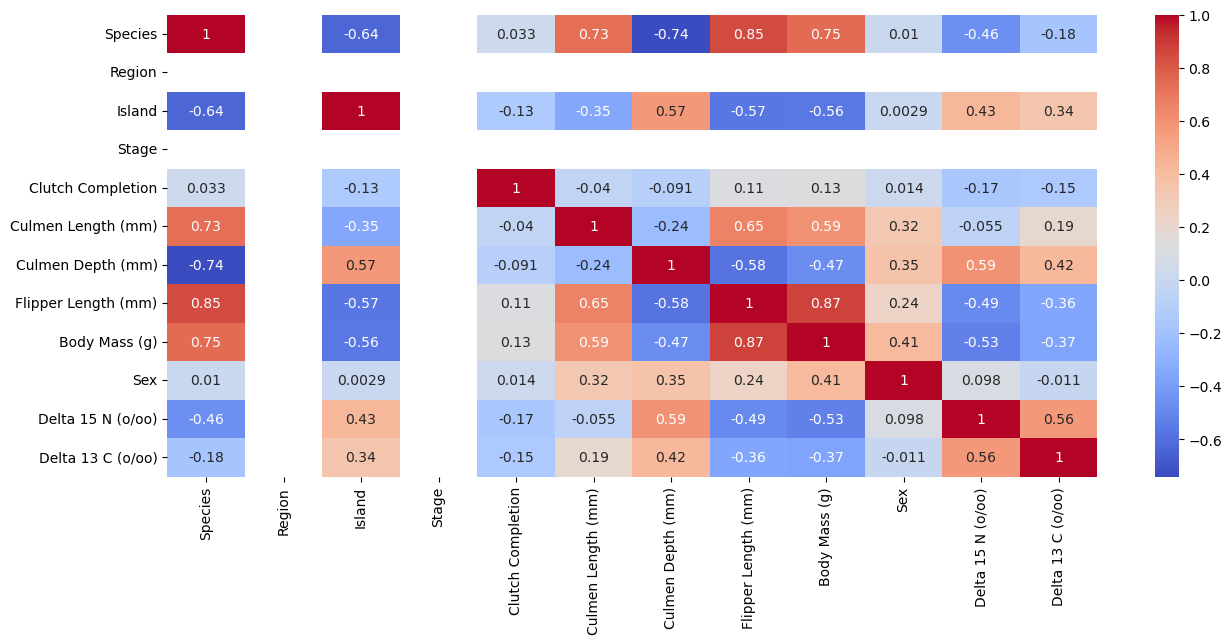

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

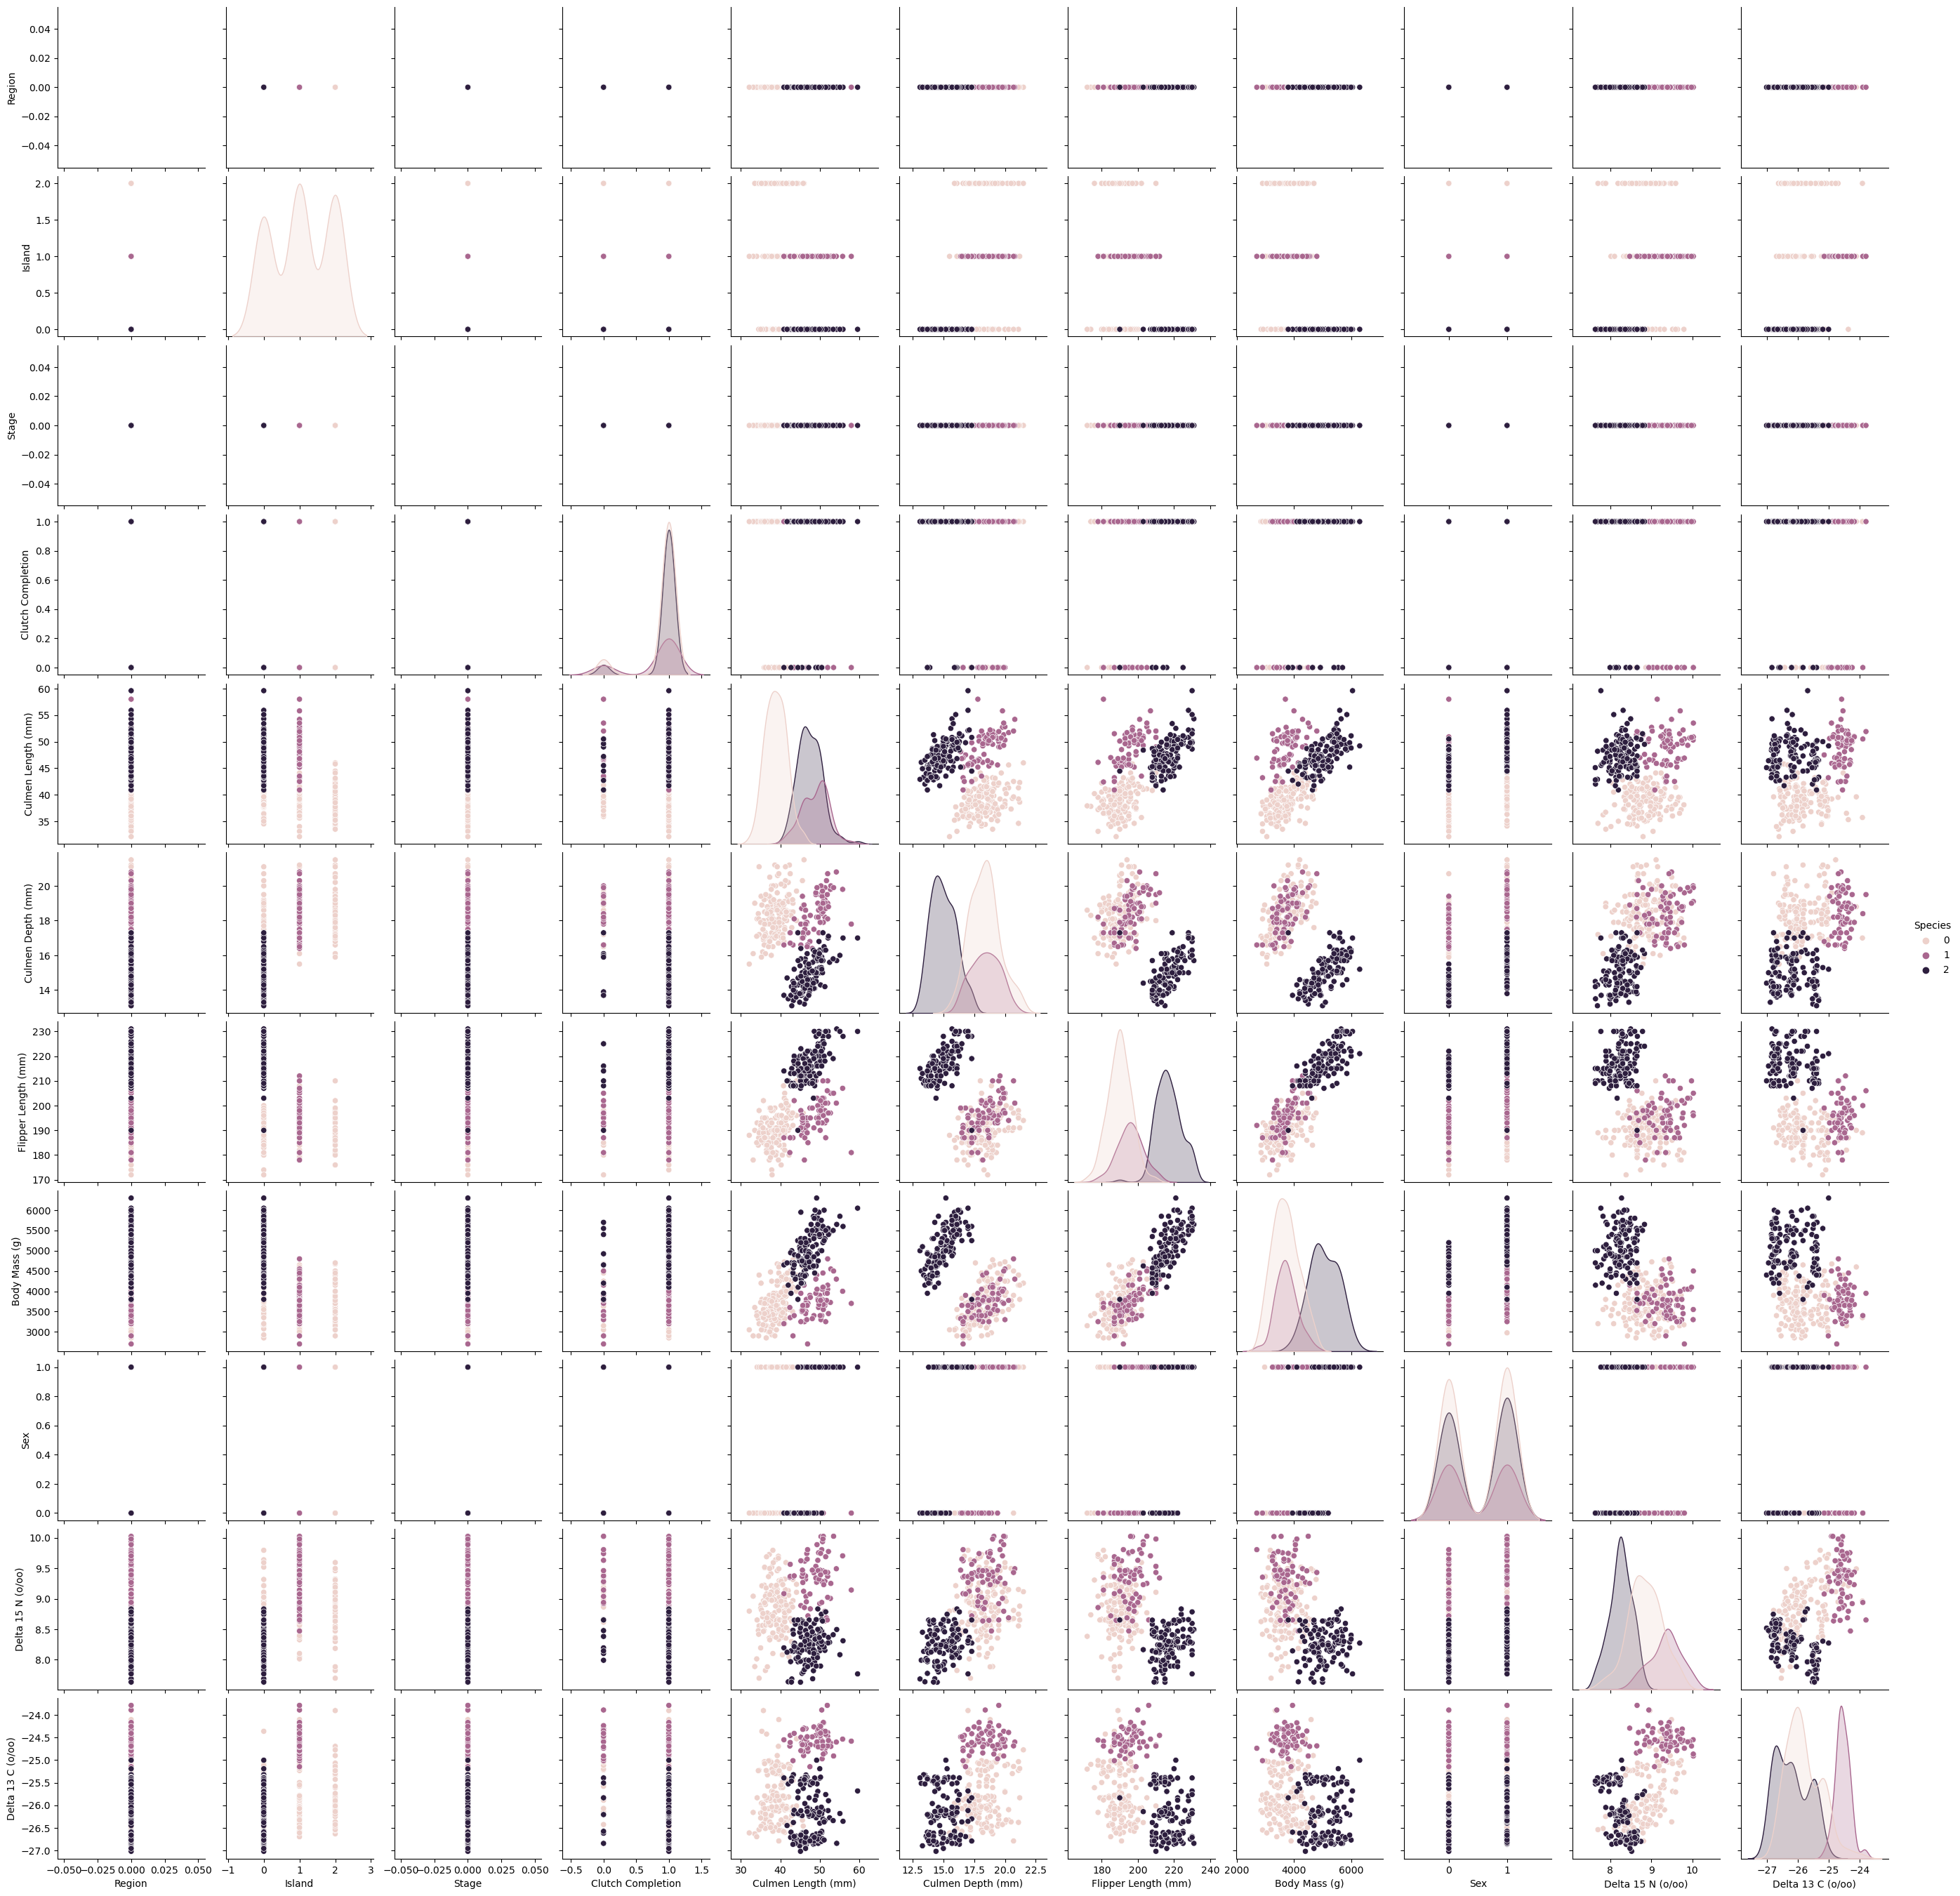

In [35]:
sns.pairplot(data=data,hue='Species')
plt.show()

In [36]:
# Split thet data into dependent and independent variables
y=data['Species']
x=data.drop(['Species'],axis=1)

In [37]:
y.head(3)

0    0
1    0
2    0
Name: Species, dtype: int32

In [38]:
x.head(3)

,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,2,0,1,39.1,18.7,181,3800,1,8.652405,-25.83352
1,0,2,0,1,39.5,17.4,186,3800,0,8.949560,-24.69454
2,0,2,0,1,40.3,18.0,190,3250,0,8.368210,-25.33302


### Check for Imbalanced Dataset

In [39]:
data['Species'].value_counts()

0    152
2    124
1     68
Name: Species, dtype: int64

In [40]:
# The data is imbalanced. We shall balance it using oversampling

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
ros = RandomOverSampler()
x_over,y_over=ros.fit_resample(x,y)

In [43]:
y_over.value_counts()

0    152
1    152
2    152
Name: Species, dtype: int64

In [44]:
# The data is balanced

In [45]:
# Split the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=90)

## Building Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

# gini as criteria
dtree1 = DecisionTreeClassifier(criterion='gini')
dtree1.fit(x_over,y_over)

# entropy as criteria
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_over,y_over)

DecisionTreeClassifier(criterion='entropy')

### Predict the model

In [47]:
y_train_pred_dtree1=dtree1.predict(x_train)
y_test_pred_dtree1=dtree1.predict(x_test)

y_train_pred_dtree2=dtree2.predict(x_train)
y_test_pred_dtree2=dtree2.predict(x_test)

### Evaluate the model

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [49]:
print(classification_report(y_train_pred_dtree1,y_train))
print()
print(classification_report(y_test_pred_dtree1,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        86

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        38

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [50]:
print(classification_report(y_train_pred_dtree2,y_train))
print()
print(classification_report(y_test_pred_dtree2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00        86

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        38

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [51]:
print(confusion_matrix(y_train_pred_dtree1,y_train))
print()
print(confusion_matrix(y_test_pred_dtree1,y_test))

[[118   0   0]
 [  0  54   0]
 [  0   0  86]]

[[34  0  0]
 [ 0 14  0]
 [ 0  0 38]]


In [52]:
print(confusion_matrix(y_train_pred_dtree2,y_train))
print()
print(confusion_matrix(y_test_pred_dtree2,y_test))

[[118   0   0]
 [  0  54   0]
 [  0   0  86]]

[[34  0  0]
 [ 0 14  0]
 [ 0  0 38]]


In [53]:
print(accuracy_score(y_train_pred_dtree1,y_train))
print()
print(accuracy_score(y_test_pred_dtree1,y_test))

1.0

1.0


In [54]:
print(accuracy_score(y_train_pred_dtree2,y_train))
print()
print(accuracy_score(y_test_pred_dtree2,y_test))

1.0

1.0


### Crossfold Validation

In [55]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(dtree1,x_train,y_train,cv=10)

In [56]:
print(accuracy)
print(accuracy.max())
print(accuracy.mean())

[0.96153846 0.96153846 0.96153846 0.96153846 0.88461538 1.
 0.92307692 0.92307692 1.         1.        ]
1.0
0.9576923076923076


In [57]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(dtree1, x_test, y_test)
#plt.show()

In [58]:
### post pruning

In [59]:
dtree1.feature_importances_

array([0.        , 0.01242526, 0.        , 0.        , 0.05305399,
       0.01627193, 0.44507959, 0.0007788 , 0.00438596, 0.00575658,
       0.46224789])

In [60]:
df = pd.DataFrame(index=x.columns,data=dtree1.feature_importances_,columns=['feature importance'])
df

,feature importance
Region,0.000000
Island,0.012425
Stage,0.000000
Clutch Completion,0.000000
Culmen Length (mm),0.053054
Culmen Depth (mm),0.016272
Flipper Length (mm),0.445080
Body Mass (g),0.000779
Sex,0.004386
Delta 15 N (o/oo),0.005757


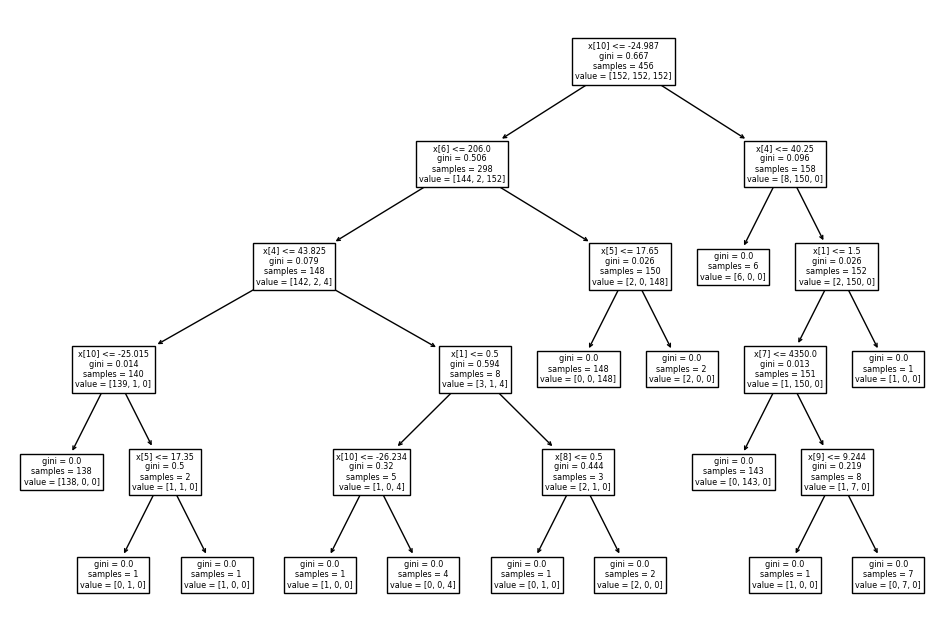

In [61]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtree1)
plt.show()

In [62]:
## Hyper parameter tunig post pruning
prunned_tree = DecisionTreeClassifier(criterion='gini',max_depth=4)
prunned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [63]:
def metrics_report():
    model_pred=prunned_tree.predict(x_test)
    print(classification_report(model_pred,y_test))
    print('***************')
    print(accuracy_score(model_pred,y_test))
    print('***************')
    plt.figure(figsize=(12,6),dpi=150)
    print(plot_tree(prunned_tree))
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.71      1.00      0.83        10
           2       0.95      1.00      0.97        36

    accuracy                           0.93        86
   macro avg       0.89      0.95      0.91        86
weighted avg       0.94      0.93      0.93        86

***************
0.9302325581395349
***************
[Text(0.5416666666666666, 0.9, 'x[6] <= 207.5\ngini = 0.636\nsamples = 258\nvalue = [118, 54, 86]'), Text(0.3333333333333333, 0.7, 'x[10] <= -25.015\ngini = 0.431\nsamples = 168\nvalue = [116, 51, 1]'), Text(0.16666666666666666, 0.5, 'x[4] <= 46.65\ngini = 0.036\nsamples = 110\nvalue = [108, 1, 1]'), Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 108\nvalue = [108, 0, 0]'), Text(0.25, 0.3, 'x[4] <= 47.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'), Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'), Text(0.3333333333333333, 0.1

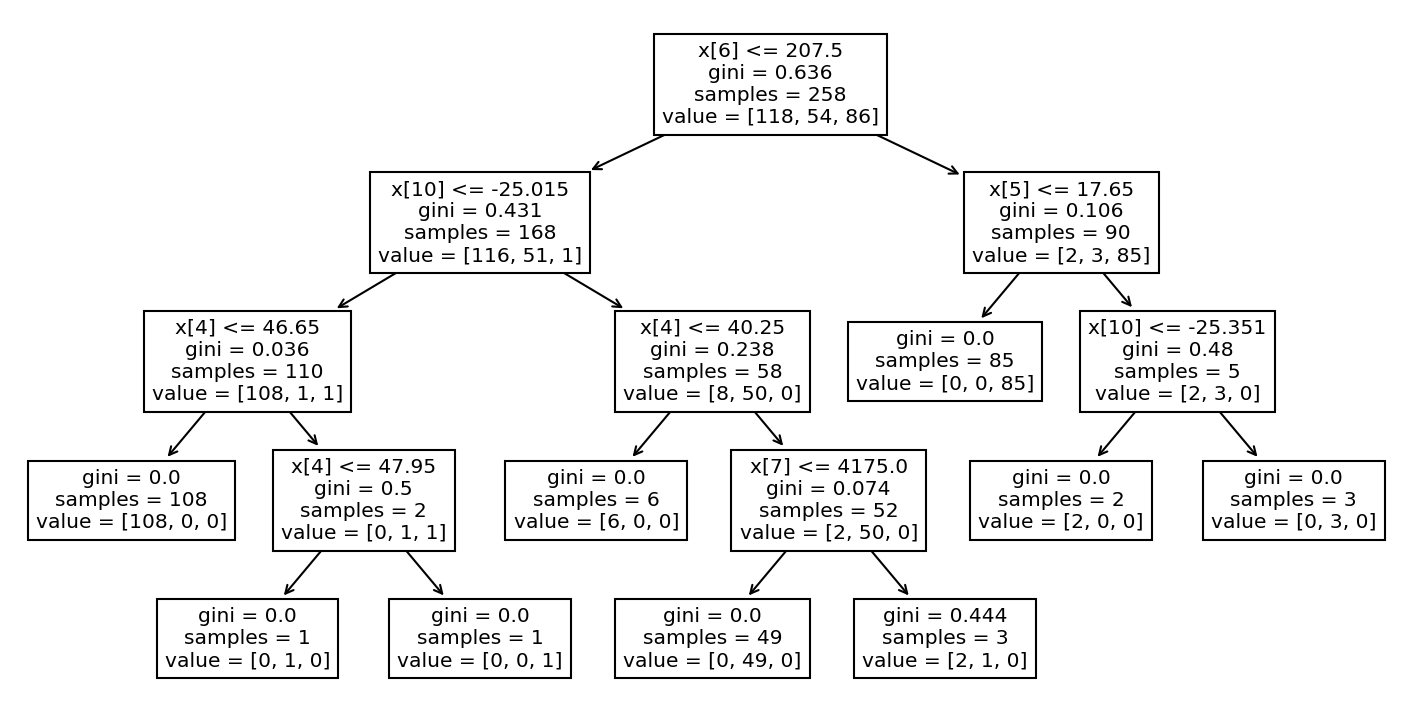

In [64]:
metrics_report()

In [65]:
model_pred_train=prunned_tree.predict(x_train)
print(classification_report(model_pred_train,y_train))
print(accuracy_score(model_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        86

    accuracy                           1.00       258
   macro avg       0.99      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

0.9961240310077519
